# WeatherPy

## Analysis
- As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
- There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
- There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import CitiPy
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City Count: {len(cities)}")

City Count: 639


## Perform API Calls

In [110]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "709eaff6487fadf0c26e0bc441b8c854"

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrival \n-----------------------------")

for i in range(len(cities)):
    try:     
        print(f"Processing Record {i + 1} | {cities[i]}")
        query_url = url + "appid=" + api_key + "&q=" + cities[i] + "&units=imperial"
        weather_response = requests.get(query_url).json()
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
    
print("----------------------------- \nData Retrieval Complete\n-----------------------------")

Beginning Data Retrival 
-----------------------------
Processing Record 1 | prince rupert
Processing Record 2 | albany
Processing Record 3 | rikitea
Processing Record 4 | peniche
Processing Record 5 | mount isa
Processing Record 6 | bonavista
Processing Record 7 | cherskiy
Processing Record 8 | ternate
Processing Record 9 | busselton
Processing Record 10 | vernon
Processing Record 11 | abu zabad
Processing Record 12 | nikolskoye
Processing Record 13 | port blair
Processing Record 14 | naze
Processing Record 15 | ribeira grande
Processing Record 16 | arraial do cabo
Processing Record 17 | iqaluit
Processing Record 18 | broome
Processing Record 19 | mataura
Processing Record 20 | kuche
City not found. Skipping...
Processing Record 21 | victoria
Processing Record 22 | saleaula
City not found. Skipping...
Processing Record 23 | barrow
Processing Record 24 | monrovia
Processing Record 25 | batagay
Processing Record 26 | hithadhoo
Processing Record 27 | port elizabeth
Processing Record 28 |

Processing Record 225 | yaan
Processing Record 226 | marzuq
Processing Record 227 | leningradskiy
Processing Record 228 | thompson
Processing Record 229 | manta
Processing Record 230 | saint-pierre
Processing Record 231 | tawkar
City not found. Skipping...
Processing Record 232 | riyadh
Processing Record 233 | villa carlos paz
Processing Record 234 | marcona
City not found. Skipping...
Processing Record 235 | adrar
Processing Record 236 | atikokan
Processing Record 237 | cap malheureux
Processing Record 238 | agadez
Processing Record 239 | caohai
Processing Record 240 | ambovombe
Processing Record 241 | tapiramuta
Processing Record 242 | warqla
City not found. Skipping...
Processing Record 243 | tumannyy
City not found. Skipping...
Processing Record 244 | hovd
Processing Record 245 | pultusk
Processing Record 246 | alofi
Processing Record 247 | adiake
Processing Record 248 | vila franca do campo
Processing Record 249 | klembivka
Processing Record 250 | lapeer
Processing Record 251 | fr

Processing Record 445 | hambantota
Processing Record 446 | coahuayana
Processing Record 447 | seymchan
Processing Record 448 | la rochelle
Processing Record 449 | san andres
Processing Record 450 | lukovetskiy
Processing Record 451 | kaoma
Processing Record 452 | banda aceh
Processing Record 453 | hobyo
Processing Record 454 | college
Processing Record 455 | lundazi
Processing Record 456 | bom jardim
Processing Record 457 | yeppoon
Processing Record 458 | solwezi
Processing Record 459 | most
Processing Record 460 | najran
Processing Record 461 | porto novo
Processing Record 462 | aklavik
Processing Record 463 | atocha
Processing Record 464 | srednekolymsk
Processing Record 465 | aykhal
Processing Record 466 | burnie
Processing Record 467 | shakawe
Processing Record 468 | tuggurt
City not found. Skipping...
Processing Record 469 | porto santo
City not found. Skipping...
Processing Record 470 | zilair
Processing Record 471 | kaitangata
Processing Record 472 | christchurch
Processing Reco

## Convert Raw Data to DataFrame

In [119]:
weather_df = pd.DataFrame({"City" : date, "Cloudiness" : cloudiness, "Country" : country, "Date" : date,
                           "Humidity" : humidity, "Lat" : lat, "Lng" : lng, "Max Temp" : max_temp,
                           "Wind Speed" : wind_speed})

# Convert to CSV and export

weather_df.count()
#weather_df.head()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

## Latitude vs. Temperature Plot

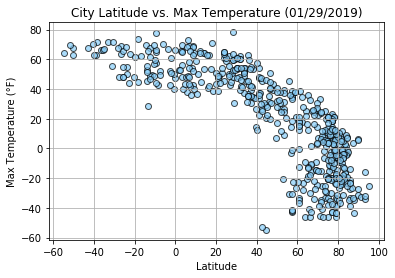

In [130]:
plt.scatter(weather_df["Max Temp"], weather_df["Lat"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Max Temperature (01/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.savefig("./latvtemp.png")
plt.show()

## Latitude vs. Humidity Plot

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

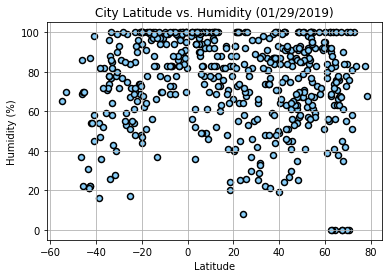

In [117]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 1, linewidth = 1.5)
plt.grid()
plt.title("City Latitude vs. Humidity (01/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt
#plt.savefig()

## Latitude vs. Cloudiness Plot

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

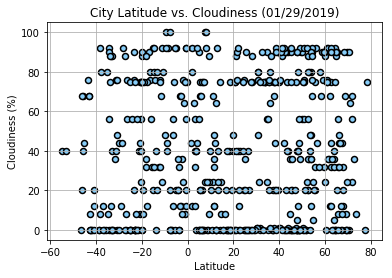

In [120]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 1, linewidth = 1.5)
plt.grid()
plt.title("City Latitude vs. Cloudiness (01/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt
#plt.savefig()

## Latitude vs. Wind Speed Plot

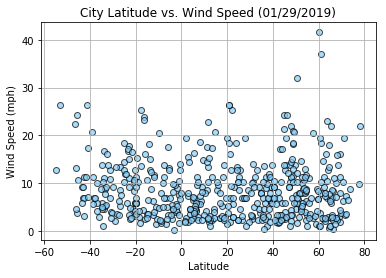

In [125]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Wind Speed (01/29/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
#plt.savefig()